<a href="https://colab.research.google.com/github/ibonetc/TensorFlow_Python/blob/master/Ejemplo2_Clasificar_Imagenes_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo usando Keras con la base de datos de perros y gatos

Enlace de datos: 
[Descargue la base de datos aquí](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data)

In [2]:
from sklearn.datasets import load_files       
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import seaborn as sns

from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D,MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
import os

Using TensorFlow backend.


## Cargando archivos desde Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Después de poner el código de autorización de Google Drive, en el panle izuqierdo, en Archivos, podrá recorrer en la carpeta drive/My Drive todos los archivos que tiene en Drive y acceder a ellos.

Con la siguiente instrucción puede listar los archivos:

In [4]:
!ls "/content/drive/My Drive/"

 0470511389_BI_Book_2009.pdf
 149_2040.JPG
'2013_Computación y sistemas con Isel1477-2451-1-PB.pdf'
 40209.pdf
 ActaPlytechnicaHungarica
 AdventureWorksDW2012_Data.mdf
 Agents
'ATT00001 (1).gdoc'
 ATT00001.gdoc
 auditory_spm12_batch.m
'Base datos completa Cancer Oral.xlsx'
 BI
 BI_DataMining_Argos
 BigDataReview
 BI_UdeM
'Bonet_CBIO (2).pdf'
'cemami1 29-ago.-2018 21-25-02.pdf'
'cemami2 29-ago.-2018 21-26-41.pdf'
'certLaboral 15-ago.-2018 16-25-03.pdf'
 CES
 CES_BigDataSalud_2017
'Clases BigData'
'Clases UdeM'
'Classic-computers-3_1 (1).pdf'
 Classic-computers-3_1.pdf
 Classroom
 codigos.txt
 codigos.txt.gdoc
'Colab Notebooks'
'Copy of Informe TG.doc'
'Copy of ReviewBigDataHealthcare.docx.gdoc'
 Curriculum
 DAE
 DAE_2017_Doctorado
 data-mining-with-sql-server-2008.pdf
 DatosAlejo.xlsx
'declacion 29-ago.-2018 21-29-58.pdf'
'declaración Dep 29-ago.-2018 21-37-03.pdf'
 DeepLearningBook.pdf
 DeepLearning-CourseContent-DetailedPlan.txt.gdoc
 DiplomadoAnalitica_AVON
 dogImages.zip
 dogs-vs-

Como el fichero está comprimido con .zip, se ejecuta la siguiente instrucción para descomprimirlo

In [5]:
!unzip "/content/drive/My Drive/dogs-vs-cats-redux-kernels-edition.zip"

Archive:  /content/drive/My Drive/dogs-vs-cats-redux-kernels-edition.zip
replace train.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: train.zip               
  inflating: sample_submission.csv   
  inflating: test.zip                


In [6]:
!unzip "/content/test.zip"
!unzip "/content/train.zip"

Archive:  /content/test.zip
replace test/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test/1.jpg              
  inflating: test/10.jpg             
  inflating: test/100.jpg            
  inflating: test/1000.jpg           
  inflating: test/10000.jpg          
  inflating: test/10001.jpg          
  inflating: test/10002.jpg          
  inflating: test/10003.jpg          
  inflating: test/10004.jpg          
  inflating: test/10005.jpg          
  inflating: test/10006.jpg          
  inflating: test/10007.jpg          
  inflating: test/10008.jpg          
  inflating: test/10009.jpg          
  inflating: test/1001.jpg           
  inflating: test/10010.jpg          
  inflating: test/10011.jpg          
  inflating: test/10012.jpg          
  inflating: test/10013.jpg          
  inflating: test/10014.jpg          
  inflating: test/10015.jpg          
  inflating: test/10016.jpg          
  inflating: test/10017.jpg          
  inflating: test/10018.jpg          


In [0]:
PATH="/content"

In [7]:
os.listdir(f'{PATH}/train')

['dog.3054.jpg',
 'dog.9434.jpg',
 'dog.7606.jpg',
 'cat.543.jpg',
 'cat.3410.jpg',
 'dog.9642.jpg',
 'cat.9726.jpg',
 'dog.6171.jpg',
 'dog.11697.jpg',
 'cat.11862.jpg',
 'cat.6915.jpg',
 'cat.9596.jpg',
 'cat.4505.jpg',
 'dog.5677.jpg',
 'cat.6099.jpg',
 'cat.7619.jpg',
 'dog.7415.jpg',
 'dog.8389.jpg',
 'dog.2126.jpg',
 'cat.3291.jpg',
 'cat.7001.jpg',
 'dog.5804.jpg',
 'cat.8395.jpg',
 'cat.62.jpg',
 'cat.7507.jpg',
 'cat.7534.jpg',
 'cat.10554.jpg',
 'dog.7705.jpg',
 'dog.6751.jpg',
 'dog.7840.jpg',
 'cat.1521.jpg',
 'cat.2473.jpg',
 'dog.8164.jpg',
 'cat.8190.jpg',
 'cat.7440.jpg',
 'cat.8880.jpg',
 'dog.4242.jpg',
 'cat.6077.jpg',
 'cat.5867.jpg',
 'cat.11264.jpg',
 'dog.3353.jpg',
 'dog.5721.jpg',
 'cat.6103.jpg',
 'cat.9998.jpg',
 'cat.672.jpg',
 'dog.3041.jpg',
 'dog.11755.jpg',
 'dog.7631.jpg',
 'dog.8276.jpg',
 'cat.8574.jpg',
 'dog.12478.jpg',
 'dog.683.jpg',
 'dog.7401.jpg',
 'dog.2161.jpg',
 'cat.8454.jpg',
 'dog.8619.jpg',
 'dog.1619.jpg',
 'cat.10739.jpg',
 'dog.428.jp

In [0]:
fnames_train = np.array([f'{PATH}/train/{f}' for f in (os.listdir(f'{PATH}/train'))])
labels_train = np.array([(0 if 'cat' in fname else 1) for fname in fnames_train])

In [9]:
fnames_train

array(['/content/train/dog.3054.jpg', '/content/train/dog.9434.jpg',
       '/content/train/dog.7606.jpg', ..., '/content/train/dog.8892.jpg',
       '/content/train/dog.7011.jpg', '/content/train/cat.10929.jpg'],
      dtype='<U28')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Gatos y Perros')

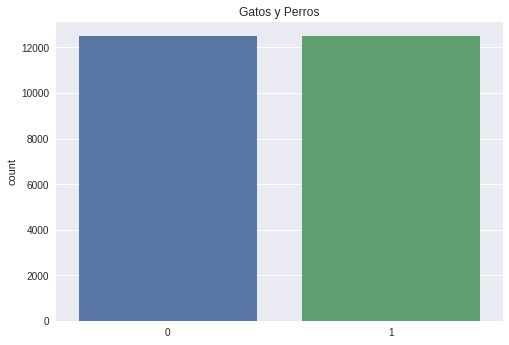

In [10]:
sns.countplot(labels_train)
sns.plt.title('Gatos y Perros')

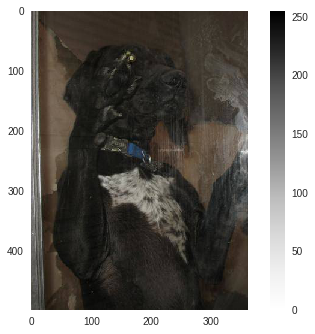

In [11]:
img = plt.imread(fnames_train[0])
plt.imshow(img)
plt.grid(False)
plt.colorbar()

In [12]:
img.shape

(499, 361, 3)

Ahora carguemos los datos de prueba

In [0]:
fnames_test = np.array([f'{PATH}/test/{f}' for f in (os.listdir(f'{PATH}/test'))])
labels_test = np.array([(0 if 'cat' in fname else 1) for fname in fnames_test])

In [14]:
len(fnames_test)

12500

### Creando el conjunto de entrenamiento y prueba:
* Necesitamos cargar las imágenes.
* Reescalarlas, porque no tienen el mimo tamaño, por ejemplo acá vamos a ponerlas de 64x64 y con canal 3

In [0]:
ROWS = 64
COLS = 64
CHANNELS = 3

In [0]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

In [0]:
def prep_data(images):
    count = len(images)
    data = np.ndarray((count, ROWS, COLS, CHANNELS))

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image   
    return data

In [0]:
train = prep_data(fnames_train)
test = prep_data(fnames_test)

In [0]:
train=train/255
test=test/255

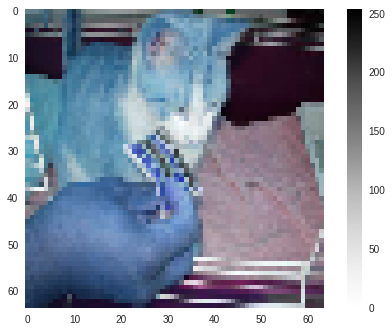

In [20]:
plt.figure()
plt.imshow(read_image(fnames_train[3]))
plt.colorbar()
plt.grid(False)
plt.show()

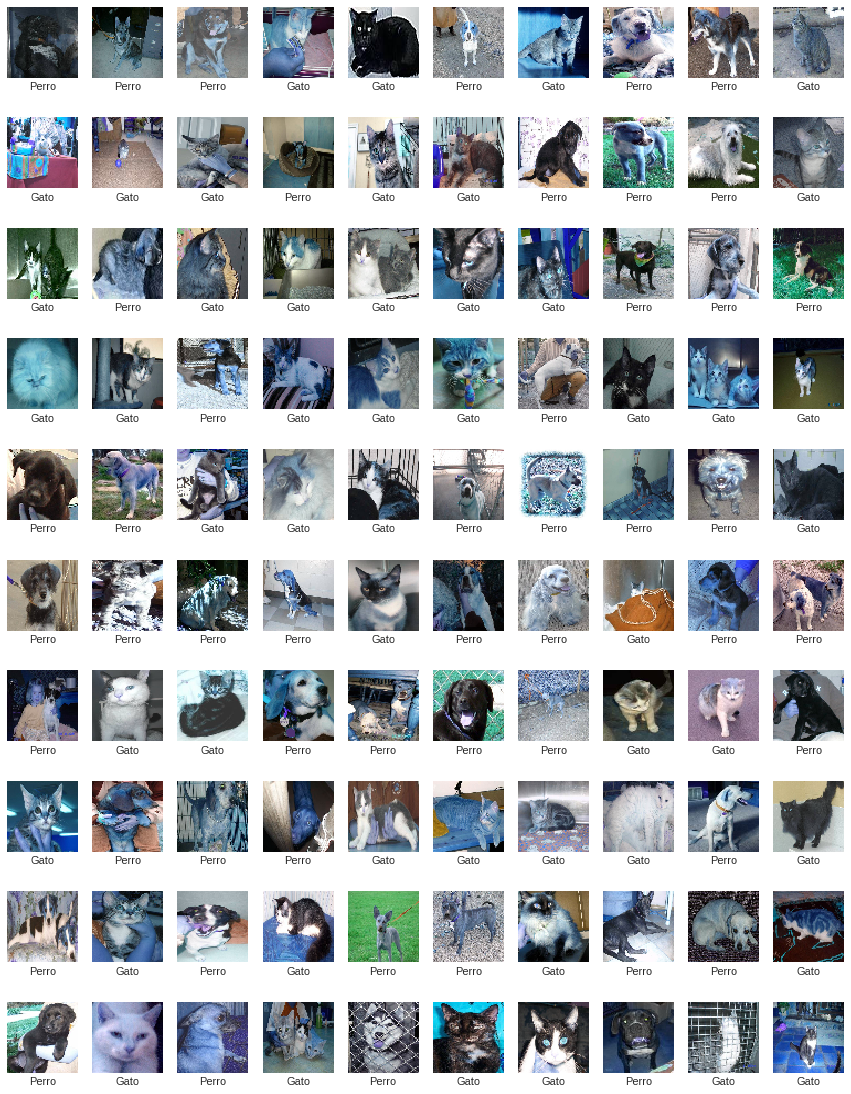

In [21]:
plt.figure(figsize=(15,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(read_image(fnames_train[i]), cmap=plt.cm.binary)
    plt.xlabel('Gato' if labels_train[i]==0 else 'Perro')
plt.show()

Definamos el siguiente modelo de red neuronal:

In [22]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Como el test no tiene labels, para poder validar el modelo vamos a dividir el entrenamiento en 80% para entrenar y 20% para validar

In [0]:
# Dividiendo la base de train en dos: 80% para train, 20% para validación)
#test_size: proporción de datos para test, random_state: semilla para el aleatorio
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(train,labels_train, test_size=0.2, 
                                                  random_state=7)

In [26]:
print(len(X_train), len(X_val))

20000 5000


In [27]:
print(np.unique(Y_train,return_counts=True),np.unique(Y_val,return_counts=True))

(array([0, 1]), array([10001,  9999])) (array([0, 1]), array([2499, 2501]))


Para hacer validación de los datos es bueno tener una base de validación o hacer una división de los datos para que en el entrenamiento pueda hacer validación con un porciento de los datos, para esto se puede usar la variable: ***validation_split***, asignándole una fracción entre 0 y 1.

O se puede pone asignar una porción de los datos, como hacemos a continuación, con la fracción de datos dividida anteriormente.

In [27]:
#validation_data=evalúa el resultado en estos datos y no en el entrenamiento.
history=classifier.fit(X_train,Y_train, epochs = 10,validation_data=(X_val,Y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 11s 540us/step - loss: 0.0354 - acc: 0.9896 - val_loss: 0.9844 - val_acc: 0.7652
Epoch 2/10
20000/20000 [==============================] - 11s 540us/step - loss: 0.0291 - acc: 0.9922 - val_loss: 1.1583 - val_acc: 0.7704
Epoch 3/10
20000/20000 [==============================] - 11s 539us/step - loss: 0.0275 - acc: 0.9918 - val_loss: 1.0875 - val_acc: 0.7654
Epoch 4/10
20000/20000 [==============================] - 11s 542us/step - loss: 0.0245 - acc: 0.9922 - val_loss: 1.5434 - val_acc: 0.7406
Epoch 5/10
20000/20000 [==============================] - 11s 544us/step - loss: 0.0187 - acc: 0.9958 - val_loss: 1.2621 - val_acc: 0.7746
Epoch 6/10
20000/20000 [==============================] - 11s 544us/step - loss: 0.0205 - acc: 0.9946 - val_loss: 1.3448 - val_acc: 0.7674
Epoch 7/10
20000/20000 [==============================] - 11s 545us/step - loss: 0.0253 - acc: 0.9930 - val_loss: 1.3

Resultados del aprendizaje y la validación

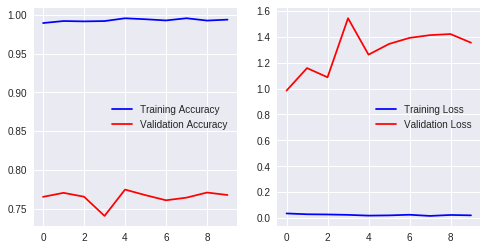

In [28]:
acc=history.history['acc']
val_acc=history.history['val_acc']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

In [0]:
predictions = classifier.predict(X_val)

Text(0.5, 0, 'Gato  0% (Gato)')

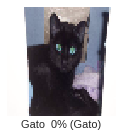

In [30]:
  index_image=10
  plt.figure(figsize=(2,2))
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_val[index_image])

  predicted_label = "Gato" if predictions[index_image]<0.5 else "Perro"
  real_label="Gato" if Y_val[index_image]==0 else "Perro"
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions[index_image]),
                                real_label))

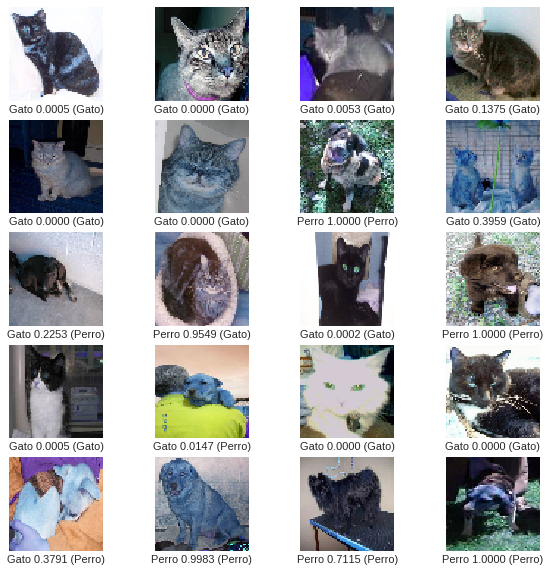

In [31]:
plt.figure(figsize=(10,10))
for index_image in range(20):
  plt.subplot(5, 4, index_image+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_val[index_image])
  predicted_label = "Gato" if predictions[index_image]<0.5 else "Perro"
  real_label="Gato" if Y_val[index_image]==0 else "Perro"
  plt.xlabel(f'{predicted_label} {np.max(predictions[index_image]):.4f} ({real_label})')

Binarizar la salida de predicción

In [0]:
predictions_label=[(0 if element<0.5 else 1) for element in predictions]

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_val, predictions_label)

In [42]:
classes = np.unique(Y_val)
classes

array([0, 1])

In [44]:
accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy
print(accuracy, misclass)


0.7676 0.23240000000000005


In [39]:
cm

array([[1969,  530],
       [ 632, 1869]])

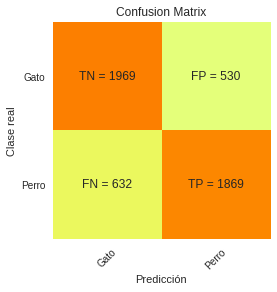

In [41]:
plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Gato','Perro']
plt.title('Confusion Matrix')
plt.ylabel('Clase real')
plt.xlabel('Predicción')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),ha="center", va="center")
        plt.rcParams["axes.grid"] = False
plt.show()

El modelo que se usó en la otra clase, que es muy simple, no permite clasificar bien en este caso:

In [0]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(64, 64,3)),
    # 128 neuronas con función de activación relu
    keras.layers.Dense(128, activation=tf.nn.relu),
    # 10 neuronas de salida con función de activación softmax
    keras.layers.Dense(2, activation=tf.nn.softmax) 
])

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [0]:
history2=model.fit(train,labels_train, epochs = 5)

Aumentar los datos es una forma de incrementar los datos, con imágenes creadas a partir de las imagenes que ya tenemos con pequeñas variaciones.

Tenemos una clase ***ImageDataGenerator*** que se utiliza para generar lotes de datos de imagen tensoriales con aumento de datos en tiempo real. Los datos se colocarán en bucle (en lotes) de forma indefinida. Los datos de imagen se generan transformando las imágenes de entrenamiento reales por rotación, recorte, desplazamiento, corte, zoom, giro, reflexión, normalización, etc. 

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator( rotation_range=90,
                 width_shift_range=0.1, height_shift_range=0.1,
                 horizontal_flip=True)
datagen.fit(X_train)

Por ejemplo, uno puede usar el método de** flow(x, y)** que toma datos numpy y matrices de etiquetas, y genera lotes de datos aumentados / normalizados. Produce lotes indefinidamente, en un bucle infinito. A continuación se muestra el fragmento de Python para visualizar las imágenes generadas utilizando el método de ***flow*** de la clase ***ImageDataGenerator***.

In [1]:
import PIL
from scipy.misc import toimage
for x_batch, y_batch in datagen.flow(X_train, Y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(Image.fromarray(x_batch[i].reshape(ROWS, COLS, CHANNELS)))
    # show the plot
    plt.show()
    break

NameError: ignored

In [0]:
data=datagen.flow(X_train, Y_train, batch_size=64)

In [0]:
classifier.fit_generator(datagen.flow(X_train, Y_train, batch_size=64),
                         steps_per_epoch=len(X_train),epochs=10, 
                         validation_data=(X_val,Y_val))